# Import Packages

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import time
import matplotlib.pyplot as plt
from functools import reduce
from scipy.spatial import distance
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans, AgglomerativeClustering

# Read and print the sample image

600 430


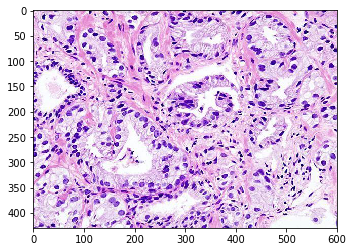

In [2]:
im = Image.open('sample2.jpg', 'r')
width, height = im.size
arr = np.array(im)
X = arr.reshape((-1,3))
print(width, height)
plt.imshow(im)

# Function to recreate image from the clustered RGB data

In [3]:
def recreate_image(codebook, labels, r, g, b):
    d = codebook.shape[1]
    image = np.zeros((r, g, b))
    label_idx = 0
    for i in range(r):
        for j in range(g):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Some other important functions

In [4]:
def get_centroids(X, labels):
    centroids = []
    for i in range(labels.min(), labels.max()+1):
        centroids.append(X[labels == i].mean(0))
    return np.vstack(centroids)

In [5]:
def get_cluster_size(labels):     
    df_labels = pd.Series(labels)
    return(df_labels.value_counts())

In [6]:
def get_wcss1(X, labels, centroids): 
    wcss = []
    for i in range(labels.min(), labels.max()+1): 
        wcss_temp = []
        for j in range(len(X[labels == i])):
            dst = distance.euclidean(centroids[i], X[labels == i][j])**2
            wcss_temp.append(dst)
        wcss_sum = sum(wcss_temp)
        wcss.append(wcss_sum)
    return wcss

In [7]:
def ssq(a, b):
    return np.sum((a - b) ** 2, axis=0)

In [8]:
def get_wcss2(X, labels, centroids): 
    wcss = []
    for i in range(labels.min(), labels.max()+1): 
        wcss_temp = []
        for j in range(len(X[labels == i])):
            dst = ssq(centroids[i], X[labels == i][j])
            wcss_temp.append(dst)
        wcss_sum = sum(wcss_temp)
        wcss.append(wcss_sum)
    return wcss

In [9]:
def get_tss(X): 
    tss = np.sum((X-X.mean(0))**2)
    return tss

In [10]:
def get_df_labels(data, labels): 
    flabels, v1, v2, v2 = [], [], [], []
    for i in range(number_clusters): 
        length = len(data[labels == i])
        for j in range(length): 
            flabels.append(i)
            v1.append(data[labels == i,0][j])
            v2.append(data[labels == i,1][j])
            v3.append(data[labels == i,2][j])

    df_labels = pd.DataFrame({ 'final_cluster': flabels, 'rgb1': v1, 'rgb2': v2, 'rgb3': v3})
    return df_labels

In [11]:
def get_df_subset_labels(data, split_index, subset_index, labels): 
    v1, v2, v3 = [], [], []
    for i in range(len(data)): 
        v1.append(data[i][0])
        v2.append(data[i][1])
        v3.append(data[i][2])
    df_res = pd.DataFrame({'index_split': np.repeat(split_index, len(data)), 'subset_index':subset_index, 
                           'cluster': labels, 'rgb1': v1, 'rgb2': v2, 'rgb3': v3})
    return df_res

In [12]:
def get_df_final_labels(data, labels): 
    v1, v2, v3 = [], [], []
    for i in range(len(data)): 
        v1.append(data[i][0])
        v2.append(data[i][1])
        v3.append(data[i][2])
    df_res = pd.DataFrame({'final_cluster': labels, 'rgb1': v1, 'rgb2': v2, 'rgb3': v3})
    return df_res

In [13]:
def get_index_split(labels, number_clusters):
    ix_split = [i//number_clusters for i in range(len(labels))]
    return ix_split

In [14]:
def get_original_cluster(labels, number_clusters):
    og_cluster = []
    for i in range(len(labels)): 
        og_cluster.append(i%number_clusters)
    return(og_cluster)

# A. K-means Clustering 

### A.1 With the "k-means++" method of initialization 

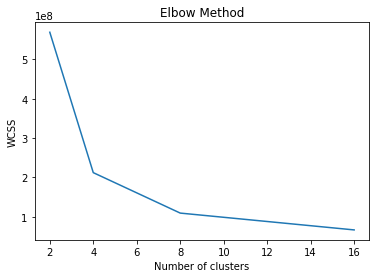

88.7109706401825


In [15]:
start = time.time()
K_range = [2,4,8,16]
Kmeans_labels, Kmeans_centers, Kmeans_wcss = [], [], []
Kmeans_cluster_size, running_time = [], []
# df_centroids = []
for i in K_range:
    start = time.time()
    kmeans_image = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_image.fit(X)
    end = time.time()
    running_time.append(end-start)
    labels = kmeans_image.labels_
    Kmeans_labels.append(labels)
    ps = pd.Series([i for i in labels])
    Kmeans_cluster_size.append(ps.value_counts())
    Kmeans_centers.append(kmeans_image.cluster_centers_)
    Kmeans_wcss.append(kmeans_image.inertia_)
#     df_temp = get_df_final_labels(X,labels)
#     df_temp_means = df_temp.groupby('final_cluster').agg({'rgb1':np.mean,'rgb2': np.mean,'rgb3':np.mean}).reset_index()
#     df_centroids.append(df_temp_means)
    
plt.plot(K_range, Kmeans_wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
end = time.time()
print(end - start)

In [16]:
for i in range(len(K_range)):
    print("Number of clusters: ", K_range[i]) 
    print("Clusters' centers: ", Kmeans_centers[i]) 
    print("Cluster size: ", Kmeans_cluster_size[i]) 
    print("Within cluster sum of squares: " , Kmeans_wcss[i]) 
    print("Running time:" , running_time[i])
    print()

Number of clusters:  2
Clusters' centers:  [[105.88073199  53.52266119 160.02323472]
 [231.55499222 201.21786924 234.19347612]]
Cluster size:  1    220531
0     37469
dtype: int64
Within cluster sum of squares:  569006428.0944552
Running time: 3.197169065475464

Number of clusters:  4
Clusters' centers:  [[244.31157725 225.27009216 245.7734282 ]
 [155.422515   102.78632925 191.14853466]
 [218.26169319 174.35327496 221.18294654]
 [ 74.78114574  23.55957487 138.76246306]]
Cluster size:  0    121695
2     92256
1     23042
3     21007
dtype: int64
Within cluster sum of squares:  212207925.74578214
Running time: 13.252514839172363

Number of clusters:  8
Clusters' centers:  [[240.69456601 212.74134841 242.87683488]
 [ 90.98037309  31.60958359 157.26567059]
 [210.93878459 160.67281963 213.18940644]
 [249.57375177 241.2740491  250.24185068]
 [177.28159446 127.97404512 199.46315047]
 [ 51.47451416  10.629206   113.86885064]
 [226.22104499 188.38601234 228.74818578]
 [134.75171174  79.14969189

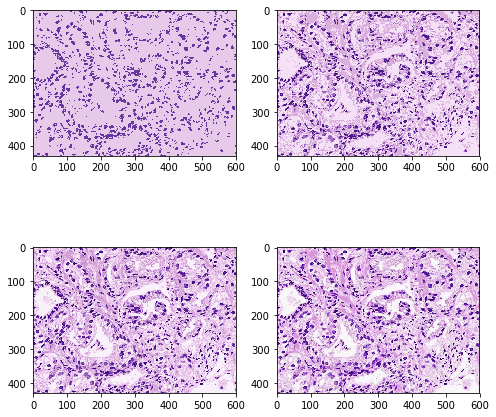

In [17]:
rows = 2 
columns = 2
fig=plt.figure(figsize=(8, 8))
for i in range(1, columns*rows+1):
    image_new = recreate_image(Kmeans_centers[i-1], Kmeans_labels[i-1], height, width, 3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_new.astype(np.uint8))

### A.2 With the "random" method of initialization 

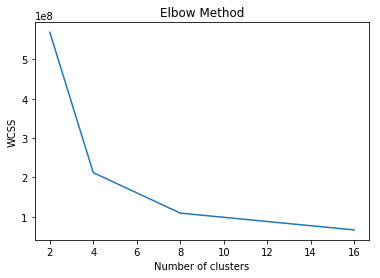

298.60915899276733


In [18]:
start = time.time()
K_range = [2,4,8,16]
Kmeans_labels2, Kmeans_centers2, Kmeans_wcss2 = [], [], []
Kmeans_cluster_size2, running_time2 = [], []
# df_centroids2 = []
for i in K_range:
    start = time.time()
    kmeans_image = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=0)
    kmeans_image.fit(X)
    end = time.time()
    running_time2.append(end-start)
    labels = kmeans_image.labels_
    Kmeans_labels2.append(labels)
    ps = pd.Series([i for i in labels])
    Kmeans_cluster_size2.append(ps.value_counts())
    Kmeans_centers2.append(kmeans_image.cluster_centers_)
    Kmeans_wcss2.append(kmeans_image.inertia_)
#     df_temp = get_df_final_labels(X,labels)
#     df_temp_means = df_temp.groupby('final_cluster').agg({'rgb1':np.mean,'rgb2': np.mean,'rgb3':np.mean}).reset_index()
#     df_centroids.append(df_temp_means)
    
plt.plot(K_range, Kmeans_wcss2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
end = time.time()
print(end - start)

In [19]:
for i in range(len(K_range)):
    print("Number of clusters: ", K_range[i]) 
    print("Clusters centers: ", Kmeans_centers2[i]) 
    print("Cluster size: ", Kmeans_cluster_size2[i]) 
    print("Within cluster sum of squares: " , Kmeans_wcss2[i]) 
    print("Running time:" , running_time2[i])
    print()

Number of clusters:  2
Clusters centers:  [[105.88073199  53.52266119 160.02323472]
 [231.55499222 201.21786924 234.19347612]]
Cluster size:  1    220531
0     37469
dtype: int64
Within cluster sum of squares:  569006428.0944552
Running time: 3.7478511333465576

Number of clusters:  4
Clusters centers:  [[157.39763561 104.89287696 191.95898596]
 [218.75224415 175.07598306 221.57818679]
 [244.45958027 225.59877702 245.90051677]
 [ 75.61219057  24.27692667 139.41321812]]
Cluster size:  2    120520
1     92701
0     23396
3     21383
dtype: int64
Within cluster sum of squares:  212209284.29658282
Running time: 17.23812961578369

Number of clusters:  8
Clusters centers:  [[177.28416736 127.97859935 199.462677  ]
 [226.22104499 188.38601234 228.74818578]
 [249.57375177 241.2740491  250.24185068]
 [210.94037706 160.6735271  213.19067819]
 [134.75434392  79.15073183 182.3811521 ]
 [240.69456601 212.74134841 242.87683488]
 [ 51.47451416  10.629206   113.86885064]
 [ 90.98152405  31.61271216 15

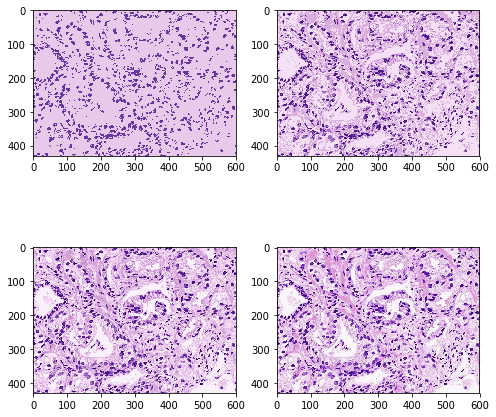

In [20]:
rows = 2 
columns = 2
fig2=plt.figure(figsize=(8, 8))
for i in range(1, columns*rows+1):
    image_new = recreate_image(Kmeans_centers2[i-1], Kmeans_labels2[i-1], height, width, 3)
    fig2.add_subplot(rows, columns, i)
    plt.imshow(image_new.astype(np.uint8))

# B. Agglomerative Hierarchical Clustering

### B.1: Use K-means clustering P times to get (P x K) centroids and then apply Hierarchical clustering on the centroids to get cluster of centroids. Finally, apply K-means with these centroids as the initial centroids to get the final clusters.

In [21]:
def multiple_Kmeans(data, number_clusters, number_repeat = 50, Kmeans_init_method = 'k-means++'):
    #Run K-means Clustering several times to get centroids 
    p_centroids = []
    for i in np.arange(number_repeat): 
        initial_kmeans = KMeans(n_clusters=number_clusters, init= Kmeans_init_method, 
                                max_iter=300, n_init=10, random_state=i, n_jobs = -1)
        initial_kmeans.fit(data)
        p_centroids.append(initial_kmeans.cluster_centers_)
    p_centroids_new = np.vstack(p_centroids)
    return p_centroids_new

In [22]:
multiKmeans_centroids = multiple_Kmeans(X, 8, number_repeat = 50, Kmeans_init_method = 'k-means++')

In [23]:
def hierarchical_method1(centroids_data, original_data, number_clusters, Hierachical_linkage='complete'): 
    #Run Agglomerative Hierarchical Clustering on the centroids to get clustered centroids  
    hier_complete = AgglomerativeClustering(n_clusters=number_clusters, affinity='euclidean', linkage = Hierachical_linkage)
    hier_complete.fit(centroids_data)
    hier_labels = hier_complete.labels_
    
    #Store clustered centroids in a dataframe to get the cluster centers 
    v1, v2, v3 = [], [], []
    length = len(hier_labels)
    for i in range(length): 
        v1.append(centroids_data[i,0])
        v2.append(centroids_data[i,1])
        v3.append(centroids_data[i,2])
    df_centroids = pd.DataFrame({ 'cluster': hier_labels, 'rgb1': v1, 'rgb2': v2, 'rgb3': v3})
    df_centroids_means = df_centroids.groupby('cluster').agg({'rgb1':[('rgb1', np.mean)],
                                                              'rgb2':[('rgb2', np.mean)],
                                                              'rgb3':[('rgb3', np.mean)]})
    
    #Run K-means Clustering with initial centroids as the cluster centers from AHC
    final_kmeans = KMeans(n_clusters=number_clusters, init = df_centroids_means.values, 
                          max_iter=300, random_state=0, n_jobs = -1)
    final_kmeans.fit(original_data)
    final_kmeans_centroids = final_kmeans.cluster_centers_
    final_kmeans_labels = final_kmeans.labels_
    final_kmeans_ps = pd.Series([i for i in final_kmeans_labels])
    final_kmeans_counts = final_kmeans_ps.value_counts()
    final_kmeans_wcss = final_kmeans.inertia_
    
    #Store result in a dictionary
    result = dict()
    result['centroids'] = final_kmeans_centroids
    result['cluster_size'] = final_kmeans_counts
    result['wcss'] = final_kmeans_wcss
    result['labels'] = final_kmeans_labels 
    return result

In [24]:
### Kmeans_init_method = 'k-means++', Hierachical_linkage='complete'

K_range = [2,4,8,16] 
hier_complete_list, running_time_hier1 = [], []
for i in range(0, len(K_range)):
    start = time.time()
    hier_result = hierarchical_method1(multiKmeans_centroids, X, K_range[i], Hierachical_linkage='complete')
    hier_complete_list.append(hier_result)
    end = time.time()
    running_time_hier1.append(end-start)
    print(hier_complete_list[i])
    print("Running time: ", running_time_hier1[i])

# # K=2 
# hier_2K_complete = hierarchical_method1(multiKmeans_centroids, X, 2, Hierachical_linkage='complete')
# print(hier_2K_complete) # print(hier_2K_complete['centroids'], hier_2K_complete['labels'])

# # K=4 
# hier_4K_complete = hierarchical_method1(multiKmeans_centroids, X, 4, Hierachical_linkage='complete')
# print(hier_4K_complete)

# # K=8
# hier_8K_complete = hierarchical_method1(multiKmeans_centroids, X, 8, Hierachical_linkage='complete')
# print(hier_8K_complete)

# # K=16 
# hier_16K_complete = hierarchical_method1(multiKmeans_centroids, X, 16, Hierachical_linkage='complete')
# print(hier_16K_complete)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


{'centroids': array([[105.89542606,  53.53772503, 160.03040405],
       [231.55705313, 201.2206662 , 234.19494796]]), 'cluster_size': 1    220530
0     37470
dtype: int64, 'wcss': 569006543.4938331, 'labels': array([1, 1, 1, ..., 1, 1, 1])}
Running time:  2.2277238368988037


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


{'centroids': array([[156.37344274, 103.78572042, 191.51129822],
       [218.5733984 , 174.81004858, 221.45441618],
       [ 75.10808   ,  23.8453501 , 139.01796605],
       [244.41714565, 225.52087095, 245.86089348]]), 'cluster_size': 3    120865
1     92708
0     23257
2     21170
dtype: int64, 'wcss': 212197586.3339562, 'labels': array([1, 1, 3, ..., 3, 3, 3])}
Running time:  2.1467864513397217


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


{'centroids': array([[135.44096036,  79.98231374, 182.75854409],
       [178.07591342, 128.75547422, 199.6998801 ],
       [ 51.83930321,  10.70647795, 114.38802395],
       [ 91.69473405,  32.27663898, 157.7230076 ],
       [211.28497234, 161.13119011, 213.45477681],
       [240.86640481, 212.9772573 , 243.03056606],
       [226.39383089, 188.74180238, 228.93212884],
       [249.57978187, 241.45434882, 250.2409495 ]]), 'cluster_size': 5    61814
6    55071
7    54517
4    38531
1    15858
0    11704
3    11316
2     9189
dtype: int64, 'wcss': 109416187.10724309, 'labels': array([4, 6, 5, ..., 7, 7, 5])}
Running time:  2.1107866764068604


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


{'centroids': array([[240.13625884, 197.99260673, 245.81699658],
       [187.86083042, 146.57348674, 193.38969485],
       [248.33091697, 223.59142238, 250.65429603],
       [ 40.36953552,   8.83424408,  97.34631148],
       [ 94.61009766,  28.72231435, 172.23272526],
       [133.60231235,  69.65755184, 197.23784181],
       [221.07637251, 148.98747458, 212.37860919],
       [114.5384758 ,  66.74318561, 151.1611348 ],
       [186.28507555, 130.26580327, 224.22186247],
       [224.43465574, 195.16820677, 224.12082262],
       [226.56227116, 171.74852746, 234.71435394],
       [157.2815216 , 108.59402947, 186.48028719],
       [235.12385764, 217.49442752, 234.13968348],
       [207.90464378, 174.75059536, 210.75848383],
       [ 68.50872236,  15.5009828 , 136.19373464],
       [249.85985367, 246.31300663, 250.37501316]]), 'cluster_size': 15    37996
2     34622
9     28785
12    26908
0     25149
13    20175
10    18846
6     12296
1      9996
14     8140
11     7937
8      6485
5      5

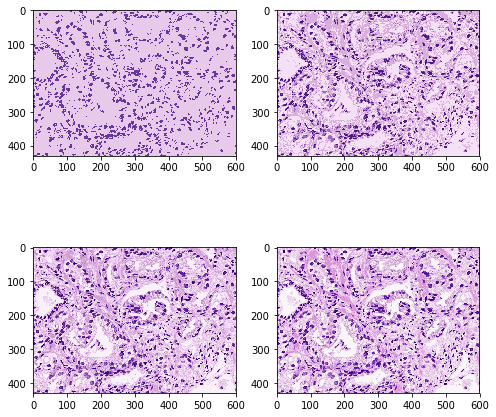

In [25]:
rows = 2 
columns = 2
fig_hier1=plt.figure(figsize=(8, 8))
heir_wcss1 = []
for i in range(1, columns*rows+1):
    image_new = recreate_image(hier_complete_list[i-1]['centroids'], hier_complete_list[i-1]['labels'], height, width, 3)
    heir_wcss1.append(hier_complete_list[i-1]['wcss'])
    fig_hier1.add_subplot(rows, columns, i)
    plt.imshow(image_new.astype(np.uint8))

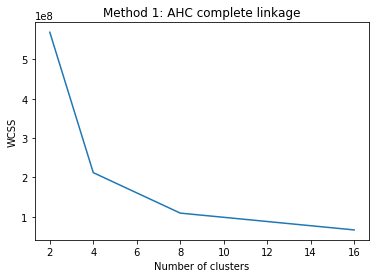

In [26]:
plt.plot(K_range, heir_wcss1)
plt.title('Method 1: AHC complete linkage')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
### Kmeans_init_method = 'k-means++', Hierachical_linkage='single'
K_range = [2,4,8,16] 
hier_single_list, running_time_hier2 = [], []
for i in range(0, len(K_range)):
    start = time.time()
    hier_result = hierarchical_method1(multiKmeans_centroids, X, K_range[i], Hierachical_linkage='single')
    hier_single_list.append(hier_result)
    end = time.time()
    running_time_hier2.append(end-start)
    print(hier_single_list[i])
    print("Running time: ", running_time_hier2[i])
    
# # K=2 
# hier_2K_single = hierarchical_method1(multiKmeans_centroids, X, 2, Hierachical_linkage='single')
# print(hier_2K_single) # print(hier_2K_single['centroids'], hier_2K_single['labels'])

# # K=4 
# hier_4K_single = hierarchical_method1(multiKmeans_centroids, X, 4, Hierachical_linkage='single')
# print(hier_4K_single)

# # K=8
# hier_8K_single = hierarchical_method1(multiKmeans_centroids, X, 8, Hierachical_linkage='single')
# print(hier_8K_single)

# # K=16 
# hier_16K_single = hierarchical_method1(multiKmeans_centroids, X, 16, Hierachical_linkage='single')
# print(hier_16K_single)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


{'centroids': array([[231.53115991, 201.18563127, 234.17802488],
       [105.71550433,  53.35343352, 159.93389667]]), 'cluster_size': 0    220562
1     37438
dtype: int64, 'wcss': 569007262.5286324, 'labels': array([0, 0, 0, ..., 0, 0, 0])}
Running time:  2.1807703971862793


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


{'centroids': array([[244.30283798, 225.24773478, 245.76282666],
       [155.35666101, 102.71706489, 191.12286199],
       [218.23433479, 174.31410765, 221.16242304],
       [ 74.759382  ,  23.53907777, 138.74946354]]), 'cluster_size': 0    121760
2     92226
1     23015
3     20999
dtype: int64, 'wcss': 212210192.06228167, 'labels': array([2, 2, 0, ..., 0, 0, 0])}
Running time:  3.0532522201538086


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


{'centroids': array([[178.07591342, 128.75547422, 199.6998801 ],
       [ 91.69473405,  32.27663898, 157.7230076 ],
       [135.44096036,  79.98231374, 182.75854409],
       [ 51.83930321,  10.70647795, 114.38802395],
       [240.86640481, 212.9772573 , 243.03056606],
       [211.28497234, 161.13119011, 213.45477681],
       [226.39383089, 188.74180238, 228.93212884],
       [249.57978187, 241.45434882, 250.2409495 ]]), 'cluster_size': 4    61814
6    55071
7    54517
5    38531
0    15858
2    11704
1    11316
3     9189
dtype: int64, 'wcss': 109416187.10724309, 'labels': array([5, 6, 4, ..., 7, 7, 4])}
Running time:  2.0508251190185547


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


{'centroids': array([[111.16618392,  44.39120203, 184.51737871],
       [199.46944464, 164.07476235, 202.46236867],
       [153.87157972,  93.76887997, 207.21506749],
       [ 44.14371914,   9.67123789, 101.46205888],
       [230.77848181, 208.61455772, 230.06594792],
       [217.06072025, 185.21459928, 217.86504021],
       [242.86632146, 203.31826843, 247.88334714],
       [250.07292812, 246.76676193, 250.61241482],
       [194.52233063, 139.74907242, 227.29819981],
       [246.42857502, 225.62917765, 247.83573132],
       [ 70.06649753,  12.19895847, 147.5482708 ],
       [223.79308588, 152.39752547, 214.57736536],
       [230.18223318, 179.16182781, 237.63133388],
       [134.79900872,  86.75730644, 168.31498889],
       [ 97.19399086,  48.09470934, 139.04485086],
       [176.33495146, 130.38496275, 189.87706028]]), 'cluster_size': 9     39790
7     36379
4     31697
5     25778
6     24161
12    21909
1     13983
11    13744
15     8856
10     7490
8      7280
13     5854
0      5

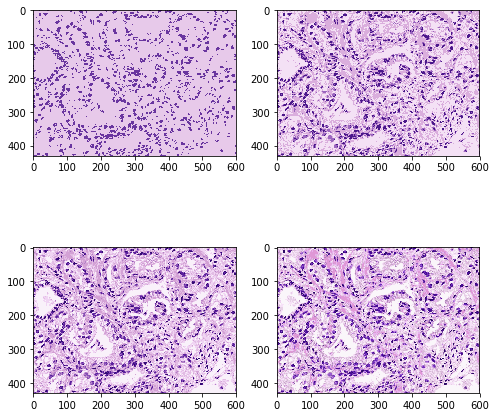

In [28]:
rows = 2 
columns = 2
fig_hier2=plt.figure(figsize=(8, 8))
heir_wcss2 = []
for i in range(1, columns*rows+1):
    image_new = recreate_image(hier_single_list[i-1]['centroids'], hier_single_list[i-1]['labels'], height, width, 3)
    heir_wcss2.append(hier_single_list[i-1]['wcss'])
    fig_hier2.add_subplot(rows, columns, i)
    plt.imshow(image_new.astype(np.uint8))

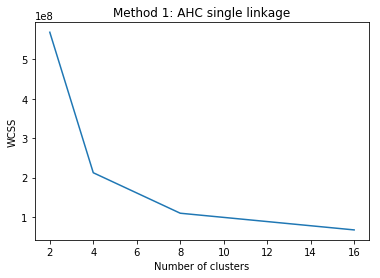

In [29]:
plt.plot(K_range, heir_wcss2)
plt.title('Method 1: AHC single linkage')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Method 2: Partition the dataset into *P* subsets and apply the AHC on each subset to get K cluster centroids. Apply AHC on all the centroids to get the final clusters. Return the labels to the original dataset. 

In [30]:
def hierarchical_method2(X, number_clusters, number_splits = 30, Hierachical_linkage='complete'): 
    hierarchical = AgglomerativeClustering(n_clusters=number_clusters, affinity='euclidean', linkage = Hierachical_linkage)
    subsetting = KFold(n_splits = number_splits, shuffle = True, random_state = 0)
    
    #First stage: Hierarchical Clustering on all the subsets
    list_all_subsets = []
    idx_split = 0
    for train_index, test_index in subsetting.split(X):
        new_X = X[test_index] 
        hierarchical.fit(new_X)
        labels = hierarchical.labels_
        list_all_subsets.append(get_df_subset_labels(new_X, idx_split, test_index, labels))
        idx_split += 1
    df_all_subsets = pd.concat(list_all_subsets)
    df_all_subsets = df_all_subsets.sort_values(by=['index_split', 'cluster'])
    df_all_subsets_centroids = df_all_subsets.groupby(['index_split', 'cluster']).agg({'rgb1':np.mean, 
                                                                                       'rgb2':np.mean,
                                                                                       'rgb3':np.mean}).reset_index()
    
    np_hier_centroids = df_all_subsets_centroids[['rgb1','rgb2','rgb3']].values
    hierarchical.fit(np_hier_centroids) 
    final_labels = hierarchical.labels_
    final_centroids = get_centroids(np_hier_centroids, final_labels)
    df_final_labels = get_df_final_labels(np_hier_centroids, final_labels)
    df_final_labels['index_split'] = get_index_split(final_labels, number_clusters)
    df_final_labels['cluster'] = get_original_cluster(final_labels, number_clusters)
    df_cluster_final_original = df_final_labels[['index_split','final_cluster','cluster']]
    df_result = pd.merge(df_all_subsets, df_cluster_final_original, how = 'left', on=['index_split', 'cluster'])
    result = dict()
    result['centroids'] = final_centroids
#     result['cluster_size'] = get_cluster_size(final_labels)
#     result['wcss'] = get_wcss2(X, final_clusters, final_centroids)
    result['labeled_dataset'] = df_result
    return result 

In [31]:
# Hierachical_linkage='complete'
#K = 2
start = time.time()
dict_hier_2K_complete = hierarchical_method2(X, 2, number_splits = 30, Hierachical_linkage='complete')
end = time.time()
print(end-start)
#K = 4
start = time.time()
dict_hier_4K_complete = hierarchical_method2(X, 4, number_splits = 30, Hierachical_linkage='complete')
end = time.time()
print(end-start)
#K = 8
start = time.time()
dict_hier_8K_complete = hierarchical_method2(X, 8, number_splits = 30, Hierachical_linkage='complete')
end = time.time()
print(end-start)
#K = 16
start = time.time()
dict_hier_16K_complete = hierarchical_method2(X, 16, number_splits = 30, Hierachical_linkage='complete')
end = time.time()
print(end-start)

115.92312860488892
115.29624223709106
114.43155765533447
115.3344075679779


In [32]:
df_hier_2K_complete = dict_hier_2K_complete['labeled_dataset'].rename(
    columns={"final_cluster": "2K_complete_final", "cluster": "2K_complete_original"}).drop(columns=['rgb1', 'rgb2', 'rgb3'])
df_hier_4K_complete = dict_hier_4K_complete['labeled_dataset'].rename(
    columns={"final_cluster": "4K_complete_final", "cluster": "4K_complete_original"}).drop(columns=['rgb1', 'rgb2', 'rgb3'])
df_hier_8K_complete = dict_hier_8K_complete['labeled_dataset'].rename(
    columns={"final_cluster": "8K_complete_final", "cluster": "8K_complete_original"}).drop(columns=['rgb1', 'rgb2', 'rgb3'])
df_hier_16K_complete = dict_hier_16K_complete['labeled_dataset'].rename(
    columns={"final_cluster": "16K_complete_final", "cluster": "16K_complete_original"}).drop(columns=['rgb1', 'rgb2', 'rgb3'])

centroids_2K_complete = dict_hier_2K_complete['centroids']
centroids_4K_complete = dict_hier_4K_complete['centroids']
centroids_8K_complete = dict_hier_8K_complete['centroids']
centroids_16K_complete = dict_hier_16K_complete['centroids']
print(centroids_2K_complete, centroids_4K_complete, centroids_8K_complete, centroids_16K_complete)

[[ 96.72394336  44.56200211 153.77064096]
 [229.6935329  198.87772488 233.18740225]] [[119.43499697  63.10749619 172.98493402]
 [192.71840754 141.89598548 206.96124634]
 [ 55.81941273  13.55315558 117.46066976]
 [235.46616635 208.31285903 237.44347235]] [[101.7540778   46.46618754 158.0924468 ]
 [211.44093907 163.14805439 217.13015986]
 [150.30389415 101.95571847 181.26238365]
 [ 36.3406023    8.51556851  89.78765783]
 [135.72217608  71.65664269 198.81620727]
 [241.14069491 219.82081903 242.6361173 ]
 [ 67.35913547  15.64414962 136.22762968]
 [180.25008242 130.22633173 201.83649303]] [[120.70598671  61.88154287 177.28194111]
 [179.70453482 131.00485938 201.5243765 ]
 [147.91202818  90.28438428 193.87796053]
 [ 75.50874564  16.24414424 152.58117571]
 [ 27.98074874   6.75765636  76.19570155]
 [207.65341621 142.17417417 216.97491737]
 [228.19585854 184.39806256 231.27530323]
 [ 52.459831     9.45017589 121.21128586]
 [ 98.34835375  54.13812371 136.40413312]
 [ 68.79901849  25.07904458 107

In [33]:
# Hierachical_linkage='single'
start = time.time()
dict_hier_2K_single = hierarchical_method2(X, 2, number_splits = 30, Hierachical_linkage='single')
end = time.time()
print(end-start)

start = time.time()
dict_hier_4K_single = hierarchical_method2(X, 4, number_splits = 30, Hierachical_linkage='single')
end = time.time()
print(end-start)

start = time.time()
dict_hier_8K_single = hierarchical_method2(X, 8, number_splits = 30, Hierachical_linkage='single')
end = time.time()
print(end-start)

start = time.time()
dict_hier_16K_single = hierarchical_method2(X, 16, number_splits = 30, Hierachical_linkage='single')
end = time.time()
print(end-start)

53.36101531982422
52.74367594718933
52.904972553253174
52.80275797843933


In [34]:
df_hier_2K_single = dict_hier_2K_single['labeled_dataset'].rename(
    columns={"final_cluster": "2K_single_final", "cluster": "2K_single_original"}).drop(columns=['rgb1', 'rgb2', 'rgb3'])
df_hier_4K_single = dict_hier_4K_single['labeled_dataset'].rename(
    columns={"final_cluster": "4K_single_final", "cluster": "4K_single_original"}).drop(columns=['rgb1', 'rgb2', 'rgb3'])
df_hier_8K_single = dict_hier_8K_single['labeled_dataset'].rename(
    columns={"final_cluster": "8K_single_final", "cluster": "8K_single_original"}).drop(columns=['rgb1', 'rgb2', 'rgb3'])
df_hier_16K_single = dict_hier_16K_single['labeled_dataset'].rename(
    columns={"final_cluster": "16K_single_final", "cluster": "16K_single_original"}).drop(columns=['rgb1', 'rgb2', 'rgb3'])

centroids_2K_single = dict_hier_2K_single['centroids']
centroids_4K_single = dict_hier_4K_single['centroids']
centroids_8K_single = dict_hier_8K_single['centroids']
centroids_16K_single = dict_hier_16K_single['centroids']
print(centroids_2K_single, centroids_4K_single, centroids_8K_single, centroids_16K_single)

[[ 65.2         25.56666667 113.6       ]
 [207.13670489 172.06813618 200.1518192 ]] [[143.54299543 104.44647684 159.37652999]
 [149.          90.         255.        ]
 [235.         100.5        210.        ]
 [ 10.5          0.         149.        ]] [[119.25252525  80.16414141 148.02441077]
 [237.         104.33333333 208.        ]
 [251.         165.5        192.5       ]
 [161.33333333 131.33333333 249.        ]
 [201.         244.         225.        ]
 [ 10.5          0.         149.        ]
 [183.         171.         255.        ]
 [213.37847848 179.84730414 223.48233057]] [[123.65621469  77.2240113  156.64124294]
 [ 23.          28.125      105.875     ]
 [202.75       231.5        227.25      ]
 [106.          64.         210.        ]
 [  0.          13.5         86.        ]
 [244.5        160.33333333 188.5       ]
 [184.33333333 202.33333333 186.66666667]
 [169.         171.         212.        ]
 [255.         155.         255.        ]
 [217.         255.         246

In [35]:
data_frames = [df_hier_2K_complete, df_hier_4K_complete, df_hier_8K_complete, df_hier_16K_complete, 
               df_hier_2K_single, df_hier_4K_single, df_hier_8K_single, df_hier_16K_single]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['index_split', 'subset_index'],
                                            how='outer'), data_frames)
df_final_result = df_merged.sort_values(by=['subset_index'])

In [36]:
final_2K_complete = df_final_result['2K_complete_final'].values
final_4K_complete = df_final_result['4K_complete_final'].values
final_8K_complete = df_final_result['8K_complete_final'].values
final_16K_complete = df_final_result['16K_complete_final'].values
final_2K_single = df_final_result['2K_single_final'].values
final_4K_single = df_final_result['4K_single_final'].values
final_8K_single = df_final_result['8K_single_final'].values
final_16K_single = df_final_result['16K_single_final'].values

In [37]:
wcss_2K_complete = get_wcss2(X, final_2K_complete, centroids_2K_complete)
wcss_4K_complete = get_wcss2(X, final_4K_complete, centroids_4K_complete)
wcss_8K_complete = get_wcss2(X, final_8K_complete, centroids_8K_complete)
wcss_16K_complete = get_wcss2(X, final_16K_complete, centroids_16K_complete)
wcss_2K_single = get_wcss2(X, final_2K_single, centroids_2K_single)
wcss_4K_single = get_wcss2(X, final_4K_single, centroids_4K_single)
wcss_8K_single = get_wcss2(X, final_8K_single, centroids_8K_single)
wcss_16K_single = get_wcss2(X, final_16K_single, centroids_16K_single)

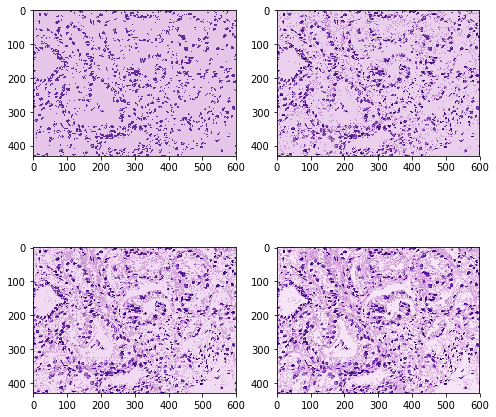

In [40]:
final_hier2_complete = [final_2K_complete, final_4K_complete, final_8K_complete, final_16K_complete]
centroids_hier2_complete = [centroids_2K_complete, centroids_4K_complete, centroids_8K_complete, centroids_16K_complete]

rows = 2 
columns = 2
fig_hier3=plt.figure(figsize=(8, 8))

for i in range(1, columns*rows+1):
    image_new = recreate_image(centroids_hier2_complete[i-1], final_hier2_complete[i-1], height, width, 3)
    fig_hier3.add_subplot(rows, columns, i)
    plt.imshow(image_new.astype(np.uint8))

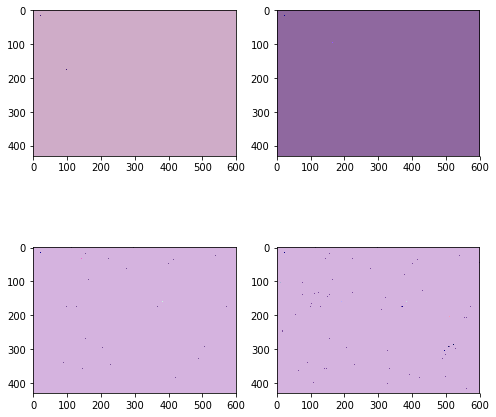

In [41]:
final_hier2_single = [final_2K_single, final_4K_single, final_8K_single, final_16K_single]
centroids_hier2_single = [centroids_2K_single, centroids_4K_single, centroids_8K_single, centroids_16K_single]

rows = 2 
columns = 2
fig_hier4=plt.figure(figsize=(8, 8))

for i in range(1, columns*rows+1):
    image_new = recreate_image(centroids_hier2_single[i-1], final_hier2_single[i-1], height, width, 3)
    fig_hier4.add_subplot(rows, columns, i)
    plt.imshow(image_new.astype(np.uint8))